In [1]:
#1. Load the given dataset
import pandas as pd

df = pd.read_csv("Kasol.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7305 non-null   object 
 1   Tmin        7305 non-null   float64
 2   Rainfall    7291 non-null   float64
 3   RH          7305 non-null   float64
 4   Solar       7305 non-null   float64
 5   Wind        7305 non-null   float64
 6   Tmax        7305 non-null   float64
 7   Discharge   7305 non-null   float64
dtypes: float64(7), object(1)
memory usage: 936.1+ KB
None
  Unnamed: 0  Tmin  Rainfall    RH  Solar  Wind  Tmax  Discharge
0   1/1/1991   3.3       0.0  0.47   7.54  2.59  11.1      133.5
1   1/2/1991   4.4       0.0  0.24  13.55  3.05   8.9      122.0
2   1/3/1991   4.4       0.0  0.33  13.37  3.34  15.6      114.8
3   1/4/1991   4.4       0.0  0.30   9.45  3.07  16.7      114.5
4   1/5/1991   5.6       0.0  0.21  13.60  3.89  16.7      113.9


In [2]:
#2. Conduct Preprocessing (Handle Missing Values, Encoding, Normalization)
from sklearn.preprocessing import MinMaxScaler

# Drop the date column if not required
df.drop(columns=["Unnamed: 0"], inplace=True)

# Fill missing values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the preprocessed dataset
print(df_scaled.head())


       Tmin  Rainfall        RH     Solar      Wind      Tmax  Discharge
0  0.035948       0.0  0.488636  0.240498  0.227394  0.059946   0.022042
1  0.071895       0.0  0.227273  0.432450  0.288564  0.000000   0.017963
2  0.071895       0.0  0.329545  0.426701  0.327128  0.182561   0.015410
3  0.071895       0.0  0.295455  0.301501  0.291223  0.212534   0.015303
4  0.111111       0.0  0.193182  0.434047  0.400266  0.212534   0.015091


In [3]:
#3. Remove the Target Variable (If Available)
# Assuming 'Discharge' is the target variable, remove it
df_clustering = df_scaled.drop(columns=["Discharge"])

# Display the dataset without the target variable
print(df_clustering.head())

       Tmin  Rainfall        RH     Solar      Wind      Tmax
0  0.035948       0.0  0.488636  0.240498  0.227394  0.059946
1  0.071895       0.0  0.227273  0.432450  0.288564  0.000000
2  0.071895       0.0  0.329545  0.426701  0.327128  0.182561
3  0.071895       0.0  0.295455  0.301501  0.291223  0.212534
4  0.111111       0.0  0.193182  0.434047  0.400266  0.212534


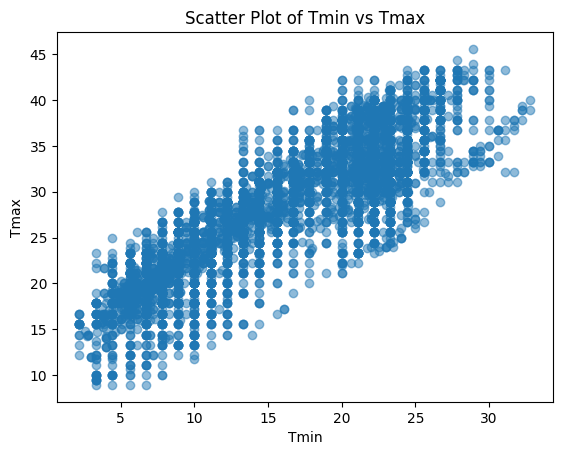

In [4]:
#4. Plot Data Points Using Scatter Plots
import matplotlib.pyplot as plt

# Scatter plot of two selected features
df_clustering = pd.read_csv("Kasol.csv")
plt.scatter(df_clustering["Tmin"], df_clustering["Tmax"], alpha=0.5)
plt.xlabel("Tmin")
plt.ylabel("Tmax")
plt.title("Scatter Plot of Tmin vs Tmax")
plt.show()


In [5]:
#5. Apply Hierarchical Agglomerative Clustering (Single Linkage)
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

# Select only numeric columns
df_numeric = df_clustering.select_dtypes(include=[np.number])

# Remove rows with any non-finite values
df_numeric_clean = df_numeric[np.isfinite(df_numeric).all(axis=1)]

# Optionally, align the original dataframe to these filtered rows
df_clustering_clean = df_clustering.loc[df_numeric_clean.index]

# Apply hierarchical clustering using single linkage on the cleaned data
Z = linkage(df_numeric_clean, method='single')

# Assign clusters (using 3 clusters as an example)
clusters = fcluster(Z, 3, criterion='maxclust')

# Add cluster labels to the cleaned dataframe
df_clustering_clean["Cluster"] = clusters

print(df_clustering_clean.head())

  Unnamed: 0  Tmin  Rainfall    RH  Solar  Wind  Tmax  Discharge  Cluster
0   1/1/1991   3.3       0.0  0.47   7.54  2.59  11.1      133.5        1
1   1/2/1991   4.4       0.0  0.24  13.55  3.05   8.9      122.0        1
2   1/3/1991   4.4       0.0  0.33  13.37  3.34  15.6      114.8        1
3   1/4/1991   4.4       0.0  0.30   9.45  3.07  16.7      114.5        1
4   1/5/1991   5.6       0.0  0.21  13.60  3.89  16.7      113.9        1


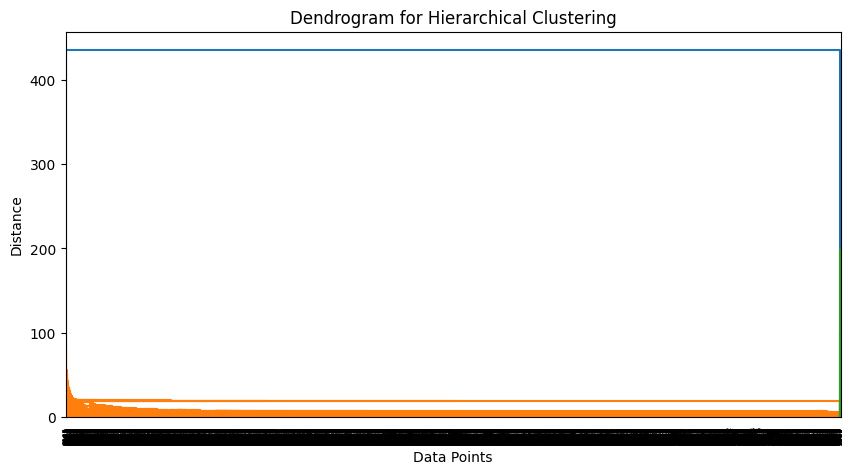

In [6]:
#6. Determine Optimal Number of Clusters Using Dendrogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Cluster Centroids:
               Tmin  Rainfall        RH      Solar      Wind      Tmax  \
Cluster                                                                 
1        16.371644  3.594776  0.323719  19.515358  3.969256  28.65866   
2        22.175000  7.025000  0.552500  21.940000  2.637500  30.67500   
3        20.000000  0.000000  0.480000  25.390000  2.590000  25.60000   

           Discharge  
Cluster               
1         399.827678  
2        2608.730000  
3        2891.000000  


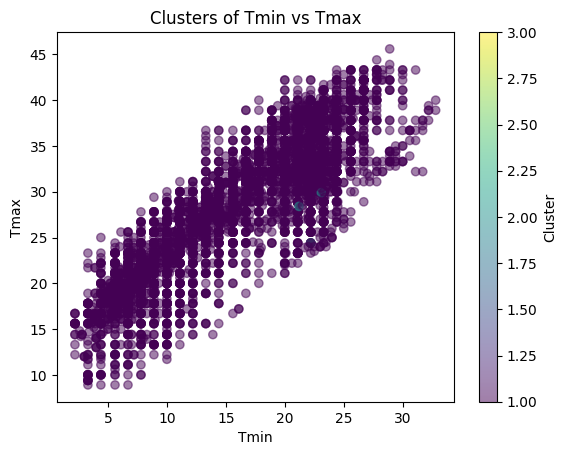

In [8]:
#7. Print and Plot Cluster Centroids and Cluster Labels
import numpy as np
centroids = df_clustering_clean.select_dtypes(include=[np.number]).groupby("Cluster").mean()
print("Cluster Centroids:\n", centroids)
plt.scatter(df_clustering_clean["Tmin"], df_clustering_clean["Tmax"], 
            c=df_clustering_clean["Cluster"], cmap='viridis', alpha=0.5)
plt.xlabel("Tmin")
plt.ylabel("Tmax")
plt.title("Clusters of Tmin vs Tmax")
plt.colorbar(label="Cluster")
plt.show()

In [9]:
#8. Repeat Clustering Algorithm for Different Cluster Values
for n_clusters in [2, 3, 4, 5]:
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    df_clustering_clean["Cluster"] = clusters
    print(f"Clusters for {n_clusters} clusters:\n", df_clustering_clean["Cluster"].value_counts())

Clusters for 2 clusters:
 Cluster
1    7286
2       5
Name: count, dtype: int64
Clusters for 3 clusters:
 Cluster
1    7286
2       4
3       1
Name: count, dtype: int64
Clusters for 4 clusters:
 Cluster
1    7286
2       3
3       1
4       1
Name: count, dtype: int64
Clusters for 5 clusters:
 Cluster
1    7285
3       3
4       1
2       1
5       1
Name: count, dtype: int64


In [ ]:
#9. Measure Clustering Performance (Silhouette Score & Davies-Bouldin Index)
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd
df_clustering = pd.read_csv("Kasol.csv")
# Select only numeric columns
df_numeric = df_clustering.select_dtypes(include=[np.number])

# Remove rows with non-finite values
df_numeric_clean = df_numeric[np.isfinite(df_numeric).all(axis=1)]
df_clustering_clean = df_clustering.loc[df_numeric_clean.index]
Z = linkage(df_numeric_clean, method='single')
clusters = fcluster(Z, 3, criterion='maxclust')
df_clustering_clean["Cluster"] = clusters
print(df_clustering_clean.head())

  Unnamed: 0  Tmin  Rainfall    RH  Solar  Wind  Tmax  Discharge  Cluster
0   1/1/1991   3.3       0.0  0.47   7.54  2.59  11.1      133.5        1
1   1/2/1991   4.4       0.0  0.24  13.55  3.05   8.9      122.0        1
2   1/3/1991   4.4       0.0  0.33  13.37  3.34  15.6      114.8        1
3   1/4/1991   4.4       0.0  0.30   9.45  3.07  16.7      114.5        1
4   1/5/1991   5.6       0.0  0.21  13.60  3.89  16.7      113.9        1


Cluster Centroids for 2 clusters:
               Tmin  Rainfall        RH      Solar      Wind      Tmax  \
Cluster                                                                 
1        16.371644  3.594776  0.323719  19.515358  3.969256  28.65866   
2        21.740000  5.620000  0.538000  22.630000  2.628000  29.66000   

           Discharge  
Cluster               
1         399.827678  
2        2665.184000  


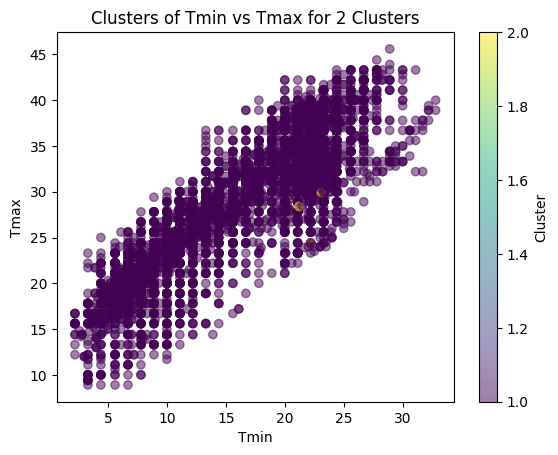

Cluster Centroids for 3 clusters:
               Tmin  Rainfall        RH      Solar      Wind      Tmax  \
Cluster                                                                 
1        16.371644  3.594776  0.323719  19.515358  3.969256  28.65866   
2        22.175000  7.025000  0.552500  21.940000  2.637500  30.67500   
3        20.000000  0.000000  0.480000  25.390000  2.590000  25.60000   

           Discharge  
Cluster               
1         399.827678  
2        2608.730000  
3        2891.000000  


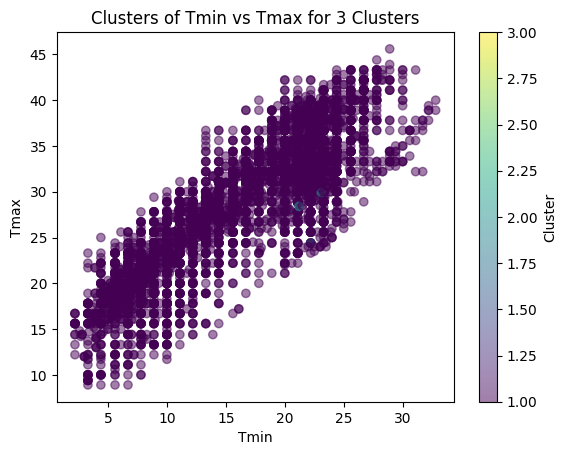

Cluster Centroids for 4 clusters:
               Tmin  Rainfall        RH      Solar      Wind       Tmax  \
Cluster                                                                  
1        16.371644  3.594776  0.323719  19.515358  3.969256  28.658660   
2        22.166667  7.200000  0.560000  21.553333  2.426667  32.766667   
3        22.200000  6.500000  0.530000  23.100000  3.270000  24.400000   
4        20.000000  0.000000  0.480000  25.390000  2.590000  25.600000   

           Discharge  
Cluster               
1         399.827678  
2        2581.206667  
3        2691.300000  
4        2891.000000  


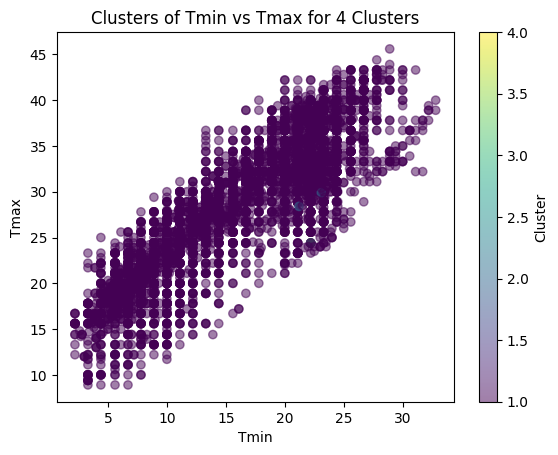

Cluster Centroids for 5 clusters:
               Tmin    Rainfall        RH      Solar      Wind       Tmax  \
Cluster                                                                    
1        16.370844    3.571137  0.323735  19.515019  3.969205  28.658325   
2        22.200000  175.800000  0.210000  21.990000  4.340000  31.100000   
3        22.166667    7.200000  0.560000  21.553333  2.426667  32.766667   
4        22.200000    6.500000  0.530000  23.100000  3.270000  24.400000   
5        20.000000    0.000000  0.480000  25.390000  2.590000  25.600000   

           Discharge  
Cluster               
1         399.754751  
2         931.100000  
3        2581.206667  
4        2691.300000  
5        2891.000000  


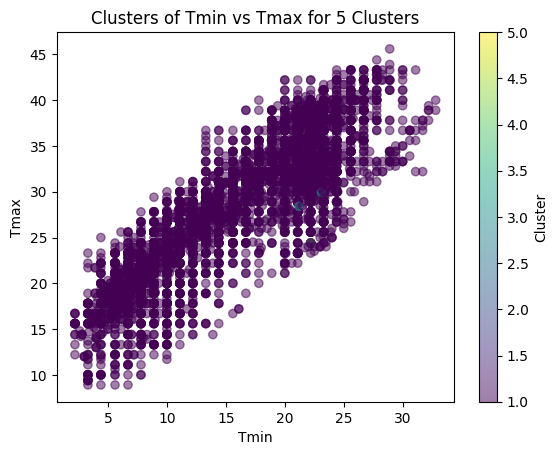

In [13]:
#10. Print and Plot Cluster Centroids and Labels for Different Clusters
for n_clusters in [2, 3, 4, 5]:
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    # Use the cleaned DataFrame which has the same number of rows as clusters
    df_clustering_clean["Cluster"] = clusters

    # Select only numeric columns before computing the centroids
    centroids = df_clustering_clean.select_dtypes(include=[np.number]).groupby("Cluster").mean()
    
    print(f"Cluster Centroids for {n_clusters} clusters:\n", centroids)

    plt.scatter(df_clustering_clean["Tmin"], df_clustering_clean["Tmax"],
                c=df_clustering_clean["Cluster"], cmap='viridis', alpha=0.5)
    plt.xlabel("Tmin")
    plt.ylabel("Tmax")
    plt.title(f"Clusters of Tmin vs Tmax for {n_clusters} Clusters")
    plt.colorbar(label="Cluster")
    plt.show()